In [ ]:
# Mount Google Drive to access files stored in your Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
# Load the 2015 flight delay dataset from Google Drive
file_path = "/content/drive/MyDrive/flight_delay_project/data/2015.csv"
df = pd.read_csv(file_path)

# Print dataset shape and show first few rows
print(df.shape)
df.head()


(5819079, 28)


,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2015-01-01,NK,195,MCO,FLL,2147,2143.0,-4.0,15.0,2158.0,...,63.0,62.0,40.0,177.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01,NK,197,LGA,FLL,1050,1104.0,14.0,20.0,1124.0,...,194.0,179.0,150.0,1076.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01,NK,198,FLL,MCO,700,712.0,12.0,19.0,731.0,...,57.0,61.0,32.0,177.0,0.0,0.0,16.0,0.0,0.0,NaN
3,2015-01-01,NK,199,IAH,LAS,2240,2251.0,11.0,8.0,2259.0,...,196.0,176.0,164.0,1222.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-01,NK,200,IAH,ORD,623,620.0,-3.0,15.0,635.0,...,152.0,140.0,115.0,925.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Drop useless column
df = df.drop(columns=['Unnamed: 27'], errors='ignore')

# Create Target Column
df['Delayed'] = (df['ARR_DELAY'] > 15).astype(int)


In [ ]:
df = df.dropna(subset=['ARR_DELAY'])  # remove if ARR_DELAY missing


In [ ]:
# Encode categorical variables using LabelEncoder
label_cols = ['OP_CARRIER', 'ORIGIN', 'DEST', 'CANCELLATION_CODE']
for col in label_cols:
    df[col] = df[col].astype(str)  # Ensure they are strings
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


In [ ]:
# Drop date column as it’s not required for modeling
df = df.drop(columns=['FL_DATE'])

In [ ]:
# Define feature matrix X and target vector y
X = df.drop(columns=['Delayed'])
y = df['Delayed']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Fill missing values with column medians
X_train = X_train.fillna(X_train.median(numeric_only=True))
X_test = X_test.fillna(X_test.median(numeric_only=True))


In [ ]:
# Train Logistic Regression model
logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=2000)

In [ ]:
# Train Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Check for any remaining missing values in training data
X_train.isnull().sum().sum(), y_train.isnull().sum()


(np.int64(0), np.int64(0))

In [ ]:
# Train XGBoost model
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Evaluate all three models: Logistic Regression, Random Forest, XGBoost
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

models = [logreg, rf, xgb]
model_names = ['Logistic Regression', 'Random Forest', 'XGBoost']

# Print evaluation metrics for each model
for model, name in zip(models, model_names):
    print(f"--- {name} ---")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("\n")


--- Logistic Regression ---
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    937616
           1       0.98      0.99      0.98    205186

    accuracy                           0.99   1142802
   macro avg       0.99      0.99      0.99   1142802
weighted avg       0.99      0.99      0.99   1142802

ROC AUC Score: 0.9898144060780643
[[932558   5058]
 [  3073 202113]]


--- Random Forest ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    937616
           1       1.00      1.00      1.00    205186

    accuracy                           1.00   1142802
   macro avg       1.00      1.00      1.00   1142802
weighted avg       1.00      1.00      1.00   1142802

ROC AUC Score: 1.0
[[937616      0]
 [     0 205186]]


--- XGBoost ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    937616
           1       1.00      1.00      1.00 

In [ ]:
# Install SHAP for explainability analysis
pip install shap


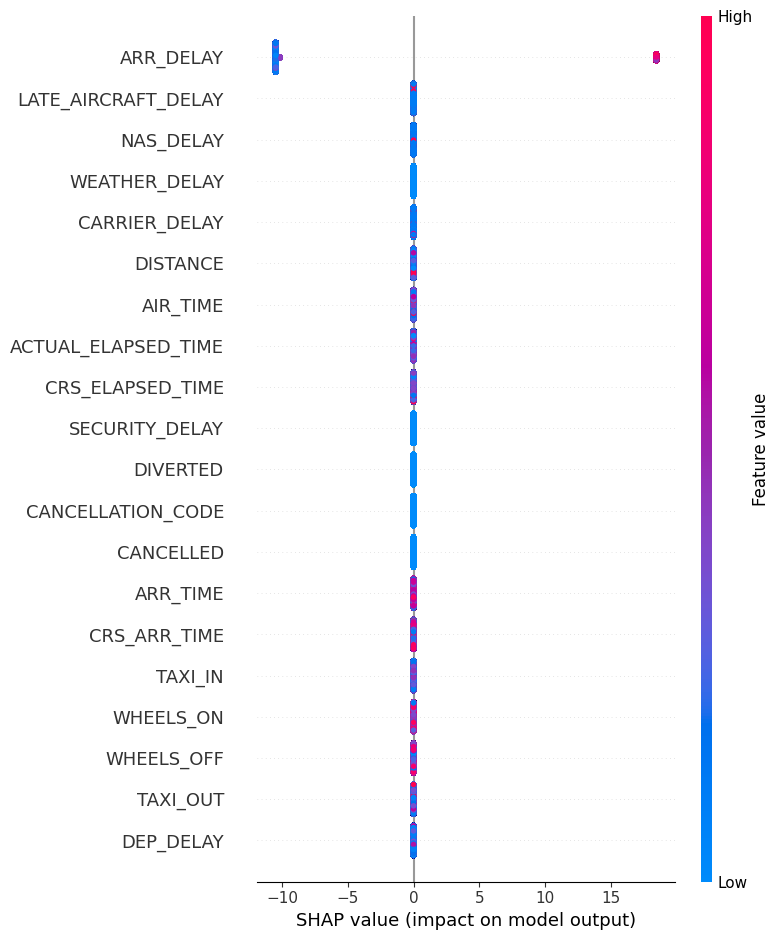

In [ ]:
# Generate SHAP values for XGBoost model and plot feature importance
import shap
explainer = shap.Explainer(xgb)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)


In [ ]:
# Save the XGBoost model using Pickle
import pickle
with open("flight_delay_xgb_model.pkl", "wb") as f:
    pickle.dump(xgb, f)


In [ ]:
# Display the list of all column names in the dataset
df.columns



Index(['OP_CARRIER', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST', 'CRS_DEP_TIME',
       'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON',
       'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'CANCELLED',
       'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'Delayed'],
      dtype='object')

In [ ]:
# Clean and convert DEP_TIME to hour
df['DEP_TIME'] = pd.to_numeric(df['DEP_TIME'], errors='coerce')  # Ensure numeric
df['DEP_HOUR'] = df['DEP_TIME'] // 100  # Example: 1230 → 12
df['DEP_HOUR'] = df['DEP_HOUR'].fillna(0).astype(int)  # Fill NaNs with 0


In [ ]:
# Prepare 5 selected features for deployment model
X = df[['DISTANCE', 'DEP_HOUR', 'ORIGIN', 'DEST', 'OP_CARRIER']]
y = df['Delayed']


In [ ]:
# Split the reduced dataset again for new training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train a new XGBoost model on the reduced feature set
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Save the 5-feature XGBoost model for deployment
import pickle
with open("flight_delay_xgb_model.pkl", "wb") as f:
    pickle.dump(xgb, f)


In [ ]:
# Download the trained model to your local machine
from google.colab import files
files.download("flight_delay_xgb_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>